In [9]:
import io
import gzip
import matplotlib.pyplot as plt
from astropy.io import fits

In [14]:
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

In [2]:
# better to do pip install lsst-alert-packet and skip this
import sys
sys.path.append('../python/')

In [3]:
import lsst.alert.packet as ap
schema = ap.Schema.from_file("../schema/3/0/lsst.v3_0.alert.avsc")

In [4]:
with open('latest_single_ccd_sample.avro','rb') as f:
    writer_schema, packet_iter = schema.retrieve_alerts(f)
    for packet in packet_iter:
        print(packet['diaSource']['diaSourceId'])

181078402474705670
181078402474705671
181078402474705672
181078402474705673
181078402474705674
181078402474705675
181078402474705676
181078402474705677
181078402474705678
181078402474705679
181078402474705680
181078402474705681
181078402474705682
181078402474705683
181078402474705684
181078402474705685
181078402474705686
181078402474705687
181078402474705688
181078402474705689
181078402474705690
181078402474705691
181078402474705692
181078402474705693
181078402474705694
181078402474705695
181078402474705696
181078402474705697
181078402474705698
181078402474705699
181078402474705700
181078402474705701
181078402474705702
181078402474705703
181078402474705704
181078402474705705
181078402474705706
181078402474705707
181078402474705708
181078402474705709
181078402474705710
181078402474705711
181078402474705712
181078402474705713
181078402474705714
181078402474705715
181078402474705716
181078402474705717
181078402474705718
181078402474705719
181078402474705720
181078402474705721
181078402474

In [5]:
packet.keys()

dict_keys(['alertId', 'diaSource', 'prvDiaSources', 'prvDiaForcedSources', 'prvDiaNondetectionLimits', 'diaObject', 'ssObject', 'cutoutDifference', 'cutoutTemplate'])

In [16]:
packet['cutoutDifference']

b'SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -32 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                   30                                                  NAXIS2  =                   30                                                  EXTEND  =                    T                                                  CUTMINX =                 1683                                                  CUTMINY =                 4063                                                  BUNIT   = \'nJy     \'                                                            WCSAXES =                    2 / Number of coordinate axes                      CRPIX1  =      15.062795740558 / Pixel coordinate of reference point            CRPIX2  =      15.117139826984 / Pixel coordinate of reference point            PC1_1   = -1.2899523471023E-07 / Coo

In [24]:
packet['cutoutTemplate']

b'SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -32 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                   30                                                  NAXIS2  =                   30                                                  EXTEND  =                    T                                                  CUTMINX =                 1683                                                  CUTMINY =                 4063                                                  BUNIT   = \'nJy     \'                                                            WCSAXES =                    2 / Number of coordinate axes                      CRPIX1  =      15.062795740558 / Pixel coordinate of reference point            CRPIX2  =      15.117139826984 / Pixel coordinate of reference point            PC1_1   = -1.2899523471023E-07 / Coo

In [47]:
def plot_cutout(stamp, ax=None, title=None, **kwargs):
    with io.BytesIO(stamp) as image_file:
        if ax is None:
            fig, ax = plt.subplots(1,1, figsize=(4,4))
        image_data = fits.getdata(image_file, ext=0)
        ax.imshow(image_data, cmap='gray')
        ax.set_title(title)

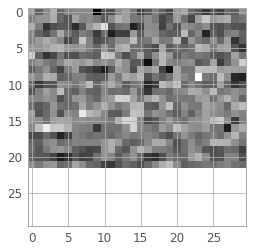

In [48]:
plot_cutout(packet['cutoutDifference'])

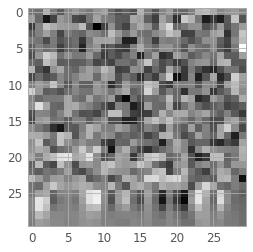

In [49]:
plot_cutout(packet['cutoutTemplate'])

In [50]:
def show_stamps(packet):
    fig, axes = plt.subplots(1,2, figsize=(8,4))
    #fig = plt.figure(figsize=(12,4))
    for i, cutout in enumerate(['Template','Difference']):
        stamp = packet['cutout{}'.format(cutout)]
        plot_cutout(stamp, ax=axes[i], title=cutout)


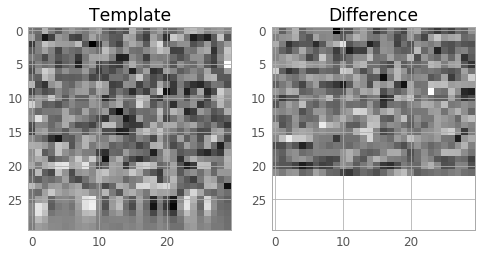

In [51]:
show_stamps(packet)